# SPLAT Tutorials: Basic Spectral Analysis

## Authors
Adam Burgasser

## Version date
27 May 2022

## Learning Goals
* Read in a spectrum from the SPLAT database or externally (splat.searchLibrary, splat.getSpectrum)
* Plot a spectrum (splat.Spectrum.plot)
* Some basic manipulation of spectra - normalizing, scaling, trimming, changing units, spectral math (splat.Spectrum)
* Flux calibrate a spectrum (splat.Spectrum.fluxCalibrate)
* Compare a spectrum to another spectrum (splat.compareSpectrum)
* Compare a spectrum a set of spectral standards (splat.classifyByStandard)
* Measure a set of indices to infer a classification (splat.measureIndexSet, splat.classifyByIndex)

## Keywords
spectral archive, spectral analysis, indices, classification

## Companion Content
None

## Summary
In this tutorial, we will examine how to draw a spectrum from the SPLAT library and conduct some basic spectral analyses to that object, including visualization, manipulation of the spectrum, using photometry to flux calibrate or measure the colors of a spectrum, measure spectral indices, and classification.


# Starting off

Let's make sure the code is properly downloaded through the import statements; see http://splat.physics.ucsd.edu/splat/ for more detail on the proper installation procedures

In [31]:
# main splat import
import splat
import splat.plot as splot
import splat.photometry as sphot
import splat.empirical as spem
import splat.model as spmdl

# other useful imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas
import astropy.units as u
from astropy.io import fits
from astropy.utils.data import download_file


In [2]:
# check what version you are using - should be later than 2023.05
splat.VERSION

'2024.02.25'

In [ ]:
# check that you have some spectra in the library
splat.DB_SPECTRA

In [ ]:
# who has contributed to this code?
splat.AUTHORS

In [ ]:
# more information about the package
help(splat)

In [ ]:
# more information about the sub-packages
help(splat.core)

# Reading in and visualizing spectra

SPLAT contains a built-in library of published SpeX prism spectra of ultracool dwarfs. It is also possible to download additional spectral datasets and read in your own spectrum or a spectrum from an website. Once you've read a spectrum into a Spectrum object, you can use the built-in features to visualize the spectrum.

In [ ]:
# grab a random spectrum from the library and plot it
# this produces a list of Spectrum objects so we want just the first one
sp = splat.getSpectrum(lucky=True)[0]
sp.plot()

In [ ]:
# get some information about this spectrum using info()
sp = splat.getSpectrum(lucky=True)[0]
sp.info()

In [ ]:
# grab a random L5 dwarf
# this produces a list of Spectrum objects so we want just the first one
sp = splat.getSpectrum(spt='L5', lucky=True)[0]
sp.plot()

In [ ]:
# grab a very specific spectrum based on its data ID
sp = splat.Spectrum(10001)
sp.plot()

In [ ]:
# grab all the spectra of TWA 30A
splist = splat.getSpectrum(name='TWA 30A')
print(splist)
for sp in splist: sp.plot()

In [ ]:
# grab a spectrum based on a "shortname" (RA and DEC shorthand)
sp = splat.getSpectrum(shortname='J0559-1404')[0]
sp.plot()

In [ ]:
# we can also search the library for spectra
# this produces a pandas table of the relevant spectra
s = splat.searchLibrary(spt=['L5','L9'],snr=50)
s

In [ ]:
# choose one of these spectra
sp = splat.Spectrum(s['DATA_KEY'][1])
sp.plot()

In [ ]:
# read in a spectrum from an online fits file
url = 'http://splat.physics.ucsd.edu/splat/spexprism/spectra/spex-prism_2MASPJ0345432+254023_20030905_BUR06B.txt'
sp = splat.Spectrum(file=url,name='2MASS J0345+2540')
sp.plot()

# Plotting spectra

There are several nice features contained in the splat.plot code and built into the .plot() routine that allows for publication-ready plots of spectra. Here's just a few examples


returning 1 lucky file



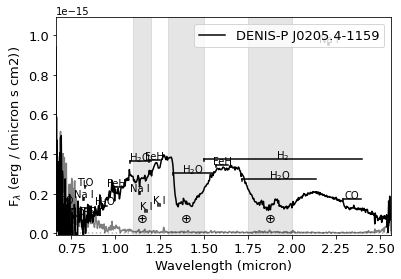

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [44]:
# get a nice high S/N L4 spectrum
sp = splat.getSpectrum(spt='L7',snr=5,lucky=True)[0]
sp.plot(telluric=True)

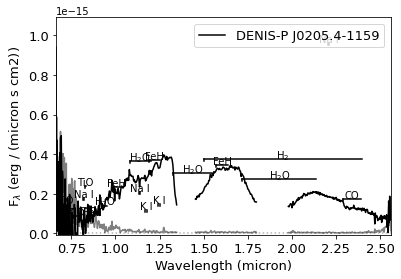

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [53]:
sp.reset()
sp.maskWave([1.35,1.42])
sp.maskWave([1.8,1.98])
sp.plot()

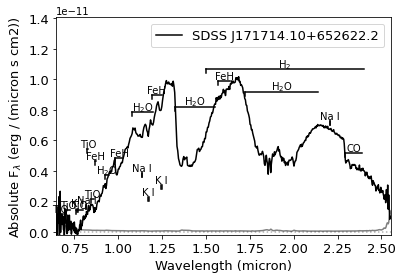

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [30]:
sp.fluxCalibrate('2MASS J',14,absolute=True)
sp.plot()

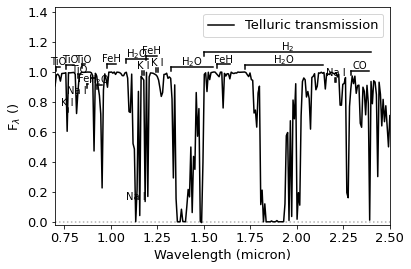

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [35]:
tell = spmdl.loadTelluric([0.7,2.5],ndata=250,output='spectrum')
tell.plot()

In [ ]:
tell = spmdl.loadTelluric

In [ ]:
tell = spmdl.getTelluric

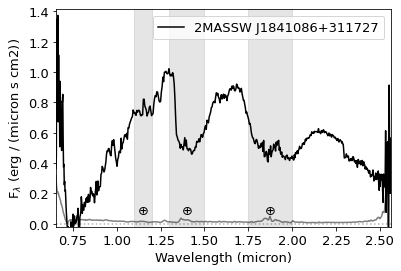

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [4]:
# there are some nice addons on the default plot routine
# this shows the regions of strong telluric absorption
sp.plot(telluric=True)

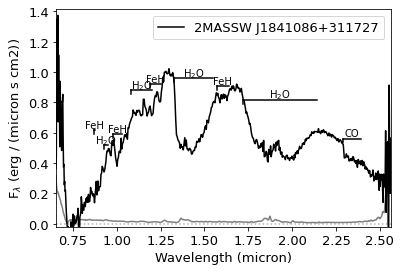

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [5]:
# this shows the locations of key spectral features
sp.plot(features=['feh','h2o','co'])

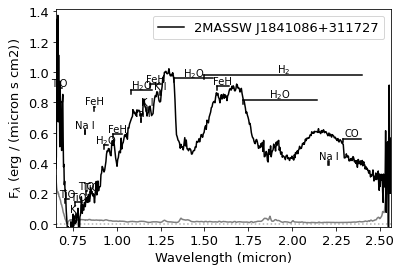

[<Figure size 432x288 with 1 Axes>]

<Figure size 432x288 with 0 Axes>

In [6]:
# or you can plot a pre-defined set of features
sp.plot(ldwarf=True)

In [7]:
# you can save you figure to .pdf or .png files
sp.plot(ldwarf=True,telluric=True,output='MyPlot.pdf')

[<Figure size 432x288 with 0 Axes>]

<Figure size 432x288 with 0 Axes>


returning 20 files



[<Figure size 432x288 with 4 Axes>,
 <Figure size 432x288 with 4 Axes>,
 <Figure size 432x288 with 4 Axes>,
 <Figure size 432x288 with 4 Axes>,
 <Figure size 432x288 with 0 Axes>]

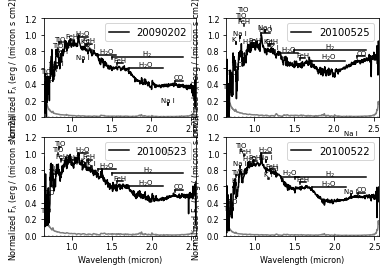

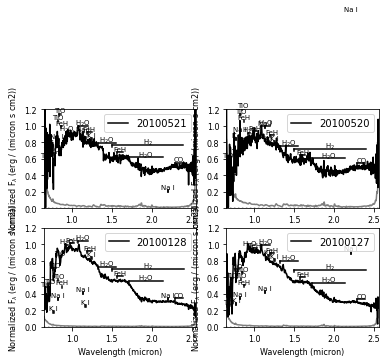

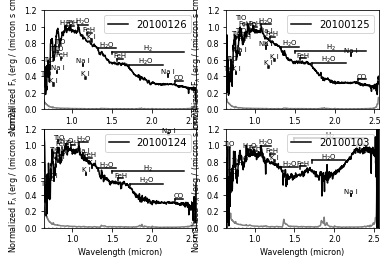

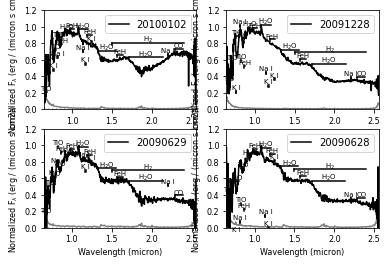

<Figure size 432x288 with 0 Axes>

In [8]:
# you can also plot a set of spectra using splat.plot.plotSpectrum commands
# this sequence reads in all of the TWA30B spectrum, normalizes them, and
# saves the file as a PDF file in your directory
splist = splat.getSpectrum(name = 'TWA 30B') # get all 20 spectra of TWA 30B
for sp in splist: sp.normalize([1.0,1.5])    # normalize the spectra
legend = [sp.observation_date for sp in splist]          # assigned legends to correspond to the observing dates
splot.plotSpectrum(splist,multiplot=True,layout=[2,2],multipage=True,legend=legend,yrange=[0,1.2],output='TWA30B.pdf')


## Spectrum manipulation

There are many built-in features for manipulating a spectrum object

In [ ]:
# grab a random T5 dwarf
sp = splat.getSpectrum(spt='T5', lucky=True)[0]
sp.plot(tdwarf=True)

In [ ]:
# normalize the spectrum to maximum value
sp.normalize()
sp.plot()

In [ ]:
# normalize over a specific region
sp.normalize([1.5,1.7])
sp.plot()

In [ ]:
# multiple by a scale factor
sp.scale(50)
sp.plot()

In [ ]:
# flux calibrate the spectrum using a photometric magnitude
# form SpeX prism spectra these should be filters in the 1-2.5 micron range
# such as 2MASS JHKs, UKIDSS JHK, HST F110W/F160W, etc.
sp.fluxCalibrate('2MASS J',14.5,absolute=True)  # the "absolute" flag indicates this is an absolute magnitude
sp.plot()

In [ ]:
# trim the edges
sp.trim([0.9,2.3])
sp.plot(telluric=True)

In [ ]:
# mask part of the spectrum
sp.maskWave([1.8,2.0])
sp.plot()

In [ ]:
# change the wavelength units
sp.toWaveUnit(u.Angstrom)
sp.plot()

In [ ]:
# change the flux units
sp.toFluxUnit(u.W/u.m/u.m/u.Angstrom)
sp.plot()

In [ ]:
# change to fnu units (erg/cm2/s/Hz)
sp.toFnu()
sp.plot()

In [ ]:
# reset all your changes to go back to the original spectrum
sp.reset()
sp.plot()

# Spectral Math

The Spectrum object takes care of all of the necessary math steps to add, subtract, multiply and divide spectra

In [ ]:
# read in M and L dwarf spectra, normalize them and add them together
sp1 = splat.getSpectrum(spt=['M5','M9'],lucky=True)[0]
sp2 = splat.getSpectrum(spt=['L0','L5'],lucky=True)[0]
sp1.normalize()
sp2.normalize()

# add together
sp3 = sp1+sp2

# plot this up using matplotlib
plt.plot(sp1.wave,sp1.flux,'b-')
plt.plot(sp2.wave,sp2.flux,'g-')
plt.plot(sp3.wave,sp3.flux,'k-')
plt.legend([sp1.name,sp2.name,'Sum'])
plt.ylim([0,2.2])
plt.xlim([0.8,2.4])
plt.xlabel('Wavelength (micron)')
plt.ylabel('Normalized Flux Density')


In [ ]:
# read in two M7 spectra, normalize them and subtract them to see differences
sp1 = splat.getSpectrum(spt='M7',lucky=True)[0]
sp2 = splat.getSpectrum(spt='M7',lucky=True)[0]
sp1.normalize()
sp2.normalize()

# subtract
sp3 = sp1-sp2

# plot the individual spectra and their difference in two panels
# note the use of the .value suffix
plt.subplot(211)
plt.plot(sp1.wave.value,sp1.flux.value,'b-')
plt.plot(sp2.wave.value,sp2.flux.value,'g-')
#plt.ylim([0,1.2])
plt.xlim([0.8,2.4])
plt.ylabel('Normalized Flux Density')
plt.legend([sp1.name,sp2.name])

plt.subplot(212)
plt.plot(sp3.wave.value,sp3.flux.value,'k-')
plt.legend(['Difference'])
plt.plot([0.8,2.4],[0,0],'k--')
plt.fill_between(sp3.wave.value,sp3.noise.value,-1.*sp3.noise.value,color='k',alpha=0.3)
#plt.ylim([-0.5,0.5])
plt.xlim([0.8,2.4])
plt.xlabel('Wavelength (micron)')
plt.ylabel('Difference')


In [ ]:
# fit part of a spectrum to a line and divide this out
fit_range = [0.8,1.15]

# read in an L dwarf spectrum and trim 
sp = splat.getSpectrum(spt='L4',snr=40,lucky=True)[0]
sp.trim(fit_range)

# fit to a line using np.polyfit
fit = np.polyfit(sp.wave.value,sp.flux.value,1)

# generate a spectrum that is this linear function
sp_continuum = splat.Spectrum(wave=sp.wave,flux=np.polyval(fit,sp.wave.value))

# divide out this continuum
sp_normalized = sp/sp_continuum

# plot the results
plt.subplot(211)
plt.plot(sp.wave.value,sp.flux.value,'k-')
plt.plot(sp_continuum.wave.value,sp_continuum.flux.value,'g-')
plt.ylim([0,np.nanquantile(sp.flux.value,0.98)*1.5])
plt.xlim(fit_range)
plt.ylabel('Normalized Flux Density')
plt.legend([sp.name,'Continuum'])

plt.subplot(212)
plt.plot(sp_normalized.wave.value,sp_normalized.flux.value,'k-')
plt.legend(['Continuum-Corrected'])
plt.plot(fit_range,[1,1],'k--')
plt.ylim([0.5,1.5])
plt.xlim(fit_range)
plt.xlabel('Wavelength (micron)')
plt.ylabel('Ratio')


We can also compare spectra to each other using the compareSpectra routine, which returns a comparison statistic (by default chi^2) and a scale factor

In [ ]:
# read in two spectra of similar types
sp1 = splat.getSpectrum(spt='L5',lucky=True)[0]
sp2 = splat.getSpectrum(spt='L5',lucky=True)[0]
chi,scale = splat.compareSpectra(sp1,sp2,plot=True)
print(chi,scale)

In [ ]:
# we can also constrain the range over which the copmarison is made
chi,scale = splat.compareSpectra(sp1,sp2,fit_range=[1.0,1.25],plot=True)
print(chi,scale)

In [ ]:
# we can now overplot these by using the scale factor
sp2.scale(scale)
plt.plot(sp1.wave,sp1.flux,'k-')
plt.plot(sp2.wave,sp2.flux,'m-')
plt.ylim([0,np.quantile(sp1.flux.value,0.98)*1.5])
plt.xlabel('Wavelength ({})'.format(sp1.flux.unit))
plt.ylabel('Flux Density ({})'.format(sp1.flux.unit))


# Comparing spectra and spectral classification

We often want to compare spectra against each other, either to classify or to fit to models. The main function to do this is splat.compareSpectra, which returns the comparison statistic and optimal scale factor, and has many options for modifying and visualizing the comparison.

In [ ]:
# check out the options of compareSpectra
splat.compareSpectra?

In [ ]:
# read in M7 and M8 spectra and compare them
sp1 = splat.getSpectrum(spt='M7',lucky=True)[0]
sp2 = splat.getSpectrum(spt='M8',lucky=True)[0]

splat.compareSpectra(sp1,sp2,plot=True)


In [ ]:
# limit comparison to a specific range
splat.compareSpectra(sp1,sp2,fit_ranges=[0.8,1.0],plot=True)


In [ ]:
# to compare to spectral standards, you can use the built-in list of these standards
splat.initializeStandards()  # first read in the standards
stdM8 = splat.STDS_DWARF_SPEX['M8.0']  # there are different standard for different instruments
splat.compareSpectra(sp2,stdM8,plot=True)


A more efficient way to accomplish this is to use the built-in **splat.classifyByStandard()** function which will find the best match among pre-defined standards

In [ ]:
# learn about the options for this routine
splat.classifyByStandard?

In [ ]:
# read in a random L5 dwarf
sp = splat.getSpectrum(spt='L5',lucky=True)[0]
sp.plot()

In [ ]:
# the easiest way to classify is to use classifyByStandard
# this will take some time on the first go as it reads in the standards
# the verbose command gives you additional feedback
splat.classifyByStandard(sp,plot=True,verbose=True)

In [ ]:
# here's what the standards are
splat.STDS_DWARF_SPEX

In [ ]:
# we can also vary how the classification is done
# this uses the method of Kirkpatrick et al. 2010, limiting the scaling to the 0.9-1.4 micron region
splat.classifyByStandard(sp,method='kirkpatrick',plot=True)

In [ ]:
# there are other standard sets we can read in, including subdwarfs and young sources
splat.initializeStandards(sd=True)
splat.STDS_SD_SPEX

In [ ]:
# now try classifying a subdwarf with these
# note that we'll need to initialize subdwarf standards
#sp = splat.getSpectrum(spt='M7',subdwarf=True,lucky=True)[0]
#splat.classifyByStandard(sp,method='kirkpatrick',plot=True)
sp = splat.getSpectrum(spt='sdM6',subdwarf=True,lucky=True)[0]
splat.classifyByStandard(sp,subdwarf=True,plot=True)


## Measuring and classifying by indices

You can also use spectral indices to classify spectra; these indices sample specific features, such as molecular absorption bands

In [ ]:
# do a basic index measurement
# read in a random T5
sp = splat.getSpectrum(spt='T5',lucky=True)[0]

# measure the ratio of two regions - first range is numerator second range is denominator
ind = splat.measureIndex(sp,[[1.1,1.2],[1.22,1.32]],method='ratio',sample='integrate')
print(ind)

In [ ]:
# here's an example of measuring an existing set of indices
# it return a dictionary with the index names conneting to the measurement & uncertainty
sp = splat.getSpectrum(spt='L4',lucky=True)[0]
sp.plot(ldwarf=True)
splat.measureIndexSet(sp,set='burgasser')

In [ ]:
# you can find what index sets are available, and their definitions, using this command
spem.info_indices()

In [ ]:
# Let's classify using the allers2013 set
# this will return the mean type and uncertainty
splat.classifyByIndex(sp,ref='allers',verbose=True)

## Classify gravity

Allers & Liu (2013) have published a gravity classification scheme that allows us to distinguish low-gravity (young) obejcts from high-gravity (old) objects

In [ ]:
# grab a young spectrum
sp = splat.getSpectrum(spt=['M9','L2'],lowg=True,snr=40,lucky=True)[0]
sp.plot()

In [ ]:
# classify by Kirkpatrick method
splat.classifyByStandard(sp,method='kirkpatrick',plot=True)

In [ ]:
# is it young?
splat.classifyGravity(sp,verbose=True)

In [ ]:
# classify with low gravity standards
splat.initializeStandards(young=True)
splat.classifyByStandard(sp,young=True,plot=True)

# Exercise

Here's a real science case: we're going to analyze the spectrum of a known unresolved binary, 2MASS J0518-2828, by measuring its indices, comparing to spectral standards, and then comparing to a binary template constructed from two differently-classified sources (L5 and T5) that are scaled to their spectral type-based absolute J-band magnitudes. The outline of this exercise is in the next few cells; the solution is provided below

In [ ]:
# first read in the spectrum of 2MASS J0518-2828 by seaching on the shortname 'J0518-2828'
# [enter code here]

In [ ]:
# measure the spectral indices from burgasser et al.
# [enter code here]

In [ ]:
# determine the spectral type using the kirkpatrick method
# [enter code here]

In [ ]:
# read in spectral templates for the primary and secondary types
# [enter code here]

In [ ]:
# the absolute magnitudes of these types come from the function splat.empirical.typeToMag
mag_L5 = spem.typeToMag('L5','2MASS J',set='filippazzo')[0]
mag_T5 = spem.typeToMag('T5','2MASS J',set='filippazzo')[0]
print(mag_L5,mag_T5)

# now use the magnitudes to scale the template spectra
# [enter here]

In [ ]:
# add the template spectra together to make a binary template
# [enter code here]

In [ ]:
# now compare the binary template and J0518-2828 spectrum using compareSpectra, and plot the result
# [enter code here]

In [ ]:
# BONUS: do the above steps a few times until you get a "best" fit, and plot the 
# appropriately scaled primary, secondary, binary templates and J0518-2828, and
# and the difference between J0518-2828 and the binary template to compare them
# [enter code here]

# Exercise Solution

In [ ]:
# read in spectrum of known spectral binary
sp = splat.getSpectrum(shortname='J0518-2828')[0]
sp.normalize()
sp.plot()

In [ ]:
# indices
splat.measureIndexSet(sp,'burgasser',verbose=True)


In [ ]:
# classification
spt,spt_e = splat.classifyByStandard(sp,plot=True)
print('\nSpectral types: {}+/-{}'.format(spt,spt_e))


In [ ]:
# read in template spectra
sp1 = splat.getSpectrum(spt='L5',snr=20,binary=False,lucky=True)[0]
sp2 = splat.getSpectrum(spt='T5',snr=20,binary=False,lucky=True)[0]

# get the right magnitudes from an empirical relation of Filippazzo et al. (2015)
# this returns the value and uncertainty
mag_L5 = spem.typeToMag('L5','2MASS J',set='filippazzo')[0]
mag_T5 = spem.typeToMag('T5','2MASS J',set='filippazzo')[0]
print('\nL5 M_J = {}, T5 M_J = {}'.format(mag_L5,mag_T5))


In [ ]:
# scale the spectra
sp1.fluxCalibrate('2MASS J',mag_L5,absolute=True)
sp2.fluxCalibrate('2MASS J',mag_T5,absolute=True)

# add them to make a binary
sp3 = sp1+sp2
sp3.plot()

In [ ]:
# do an initial compareSpectra to get the scale factors
chi,scl_std = splat.compareSpectra(sp,splat.STDS_DWARF_SPEX[spt])
chi,scl_binary = splat.compareSpectra(sp,sp3)
sp3.scale(scl_binary)


In [ ]:
# read in spectrum of known spectral binary
sp = splat.getSpectrum(shortname='J0518-2828')[0]
sp.normalize()

# indices
splat.measureIndexSet(sp,'burgasser',verbose=True)

# classification
spt,spt_e = splat.classifyByStandard(sp)
print('\nSpectral types: {}+/-{}'.format(spt,spt_e))

# read in template spectra
sp1 = splat.getSpectrum(spt='L5',snr=20,binary=False,lucky=True)[0]
sp2 = splat.getSpectrum(spt='T5',snr=20,binary=False,lucky=True)[0]

# get the right magnitudes from an empirical relation of Filippazzo et al. (2015)
# this returns the value and uncertainty
mag_L5 = spem.typeToMag('L5','2MASS J',set='filippazzo')[0]
mag_T5 = spem.typeToMag('T5','2MASS J',set='filippazzo')[0]
print('\nL5 M_J = {}, T5 M_J = {}'.format(mag_L5,mag_T5))

# scale the spectra
sp1.fluxCalibrate('2MASS J',mag_L5,absolute=True)
sp2.fluxCalibrate('2MASS J',mag_T5,absolute=True)

# add them to make a binary
sp3 = sp1+sp2

# do an initial compareSpectra to get the scale factors
chi,scl_std = splat.compareSpectra(sp,splat.STDS_DWARF_SPEX[spt])
chi,scl_binary = splat.compareSpectra(sp,sp3)

# compute the difference
spdiff = sp-sp3

# visualize the results
plt.figure(figsize=[6,8])
plt.subplot(211)
plt.plot(sp.wave,sp.flux,'k-')
plt.plot(splat.STDS_DWARF_SPEX[spt].wave,splat.STDS_DWARF_SPEX[spt].flux*scl_std,'b-')
plt.legend(['J0518-2828',spt])
plt.ylim([0,np.nanquantile(sp.flux.value,0.98)*1.5])
plt.xlim([0.8,2.4])
plt.ylabel('Normalized Flux Density')

plt.subplot(212)
plt.plot(sp.wave,sp.flux,'k-')
plt.plot(sp1.wave,sp1.flux*scl_binary,'m-')
plt.plot(sp2.wave,sp2.flux*scl_binary,'b-')
plt.plot(sp3.wave,sp3.flux*scl_binary,'g-')
plt.legend(['J0518-2828','L5','T5','L5+T5'])
plt.ylim([0,np.nanquantile(sp.flux.value,0.98)*1.5])
plt.xlim([0.8,2.4])
plt.ylabel('Normalized Flux Density')
plt.xlabel('Wavelength')


